In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import missingno as msno
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


In [57]:
df = pd.read_csv('Peru.csv', delimiter=';', encoding= 'ANSI')


In [3]:
df2 = pd.read_csv('sismos_peru_con_ubicacion.csv')

In [4]:
df2.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M),coordenadas,pais,departamento,provincia,ciudad o pueblo
0,13/01/1960,15:40:34.00,-16.145,-72.144,60,7.5,"-16.145,-72.144",Perú,Arequipa,Caylloma,Majes
1,15/01/1960,09:30:24.00,-15.000,-75.000,70,7.0,"-15.0,-75.0",Perú,Ica,Nasca,Marcona
2,17/01/1960,02:57:58.00,-14.500,-74.500,150,6.4,"-14.5,-74.5",Perú,Ayacucho,Lucanas,Otoca
3,23/01/1960,03:37:32.00,-12.500,-68.500,300,5.8,"-12.5,-68.5",Bolivia,La Paz,NaN,Municipio Ixiamas
4,30/01/1960,05:07:24.00,-5.500,-77.500,100,5.7,"-5.5,-77.5",Perú,Loreto,Datem del Marañón,Barranca


In [58]:
df.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,13/01/1960,15:40:34.00,-16.145,-72.144,60,7.5
1,15/01/1960,09:30:24.00,-15.000,-75.000,70,7.0
2,17/01/1960,02:57:58.00,-14.500,-74.500,150,6.4
3,23/01/1960,03:37:32.00,-12.500,-68.500,300,5.8
4,30/01/1960,05:07:24.00,-5.500,-77.500,100,5.7


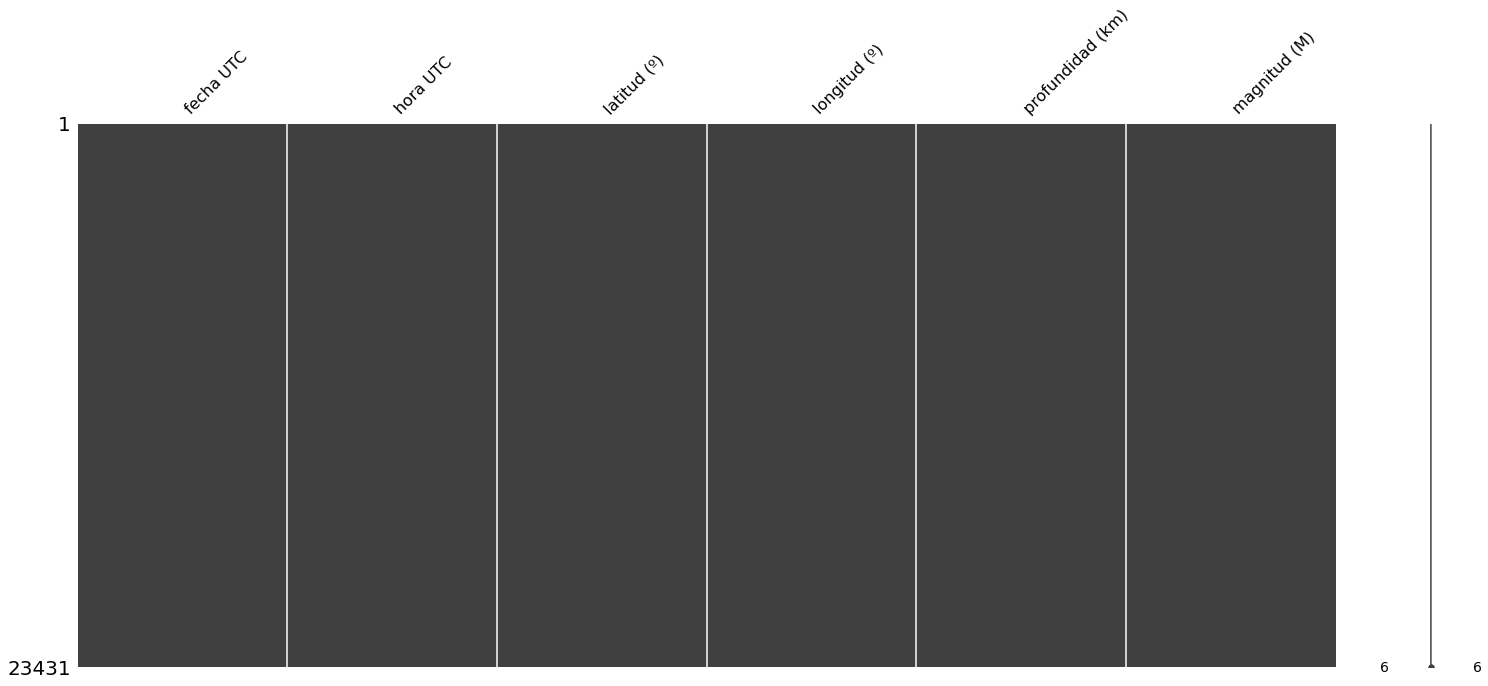

In [59]:
msno.matrix(df)

plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23431 entries, 0 to 23430
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha UTC         23431 non-null  object 
 1   hora UTC          23431 non-null  object 
 2   latitud (º)       23431 non-null  float64
 3   longitud (º)      23431 non-null  float64
 4   profundidad (km)  23431 non-null  int64  
 5   magnitud (M)      23431 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


In [61]:
df["fecha UTC"] = pd.to_datetime(df["fecha UTC"], dayfirst=True)


In [62]:
df['latitud (º)'] = df['latitud (º)'].astype(float)
df['longitud (º)'] = df['longitud (º)'].astype(float)

In [63]:
por_año = df.groupby(df["fecha UTC"].dt.year).size()


In [64]:
df.head(20)

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,1960-01-13,15:40:34.00,-16.145,-72.144,60,7.5
1,1960-01-15,09:30:24.00,-15.000,-75.000,70,7.0
2,1960-01-17,02:57:58.00,-14.500,-74.500,150,6.4
3,1960-01-23,03:37:32.00,-12.500,-68.500,300,5.8
4,1960-01-30,05:07:24.00,-5.500,-77.500,100,5.7
5,1960-02-08,19:06:16.00,-8.500,-74.500,136,5.3
6,1960-02-13,20:40:06.00,-17.500,-70.000,150,5.9
7,1960-03-09,23:54:25.00,-16.389,-73.817,80,6.2
8,1960-04-01,13:18:23.00,-14.500,-73.500,100,6.1
9,1960-05-04,01:28:52.00,-18.000,-71.500,100,5.0


In [73]:
latitud_promedio = df['latitud (º)'].mean()
longitud_promedio = df['longitud (º)'].mean()
mapa = folium.Map(location=[latitud_promedio, longitud_promedio], zoom_start=5)
for index, row in df.head(5000).iterrows():
    latitud = row['latitud (º)']
    longitud = row['longitud (º)']
    folium.Marker([latitud, longitud]).add_to(mapa)
mapa

In [66]:
df["Año"] = df["fecha UTC"].dt.year

In [67]:
df.describe()

,latitud (º),longitud (º),profundidad (km),magnitud (M),Año
count,23431.000000,23431.000000,23431.000000,23431.000000,23431.000000
mean,-11.369205,-75.705019,71.033119,4.726418,2002.877769
std,4.479011,3.095005,66.359099,0.436428,14.826039
min,-23.397100,-82.893700,0.000000,3.000000,1960.000000
25%,-15.376000,-77.767800,29.000000,4.500000,1994.000000
50%,-11.710000,-75.746500,48.000000,4.700000,2006.000000
75%,-7.907250,-73.604200,106.000000,4.900000,2015.000000
max,-1.496000,-66.980700,743.000000,8.400000,2023.000000


In [74]:
df['magnitud (M)'].unique()

array([7.5, 7. , 6.4, 5.8, 5.7, 5.3, 5.9, 6.2, 6.1, 5. , 5.4, 5.6, 6.8,
       5.2, 5.1, 6. , 5.5, 6.6, 4.8, 7.1, 4.6, 6.7, 4.9, 6.9, 4.5, 4.7,
       7.8, 7.6, 6.3, 8. , 6.5, 4.2, 4.3, 4. , 4.1, 7.7, 7.2, 4.4, 8.4,
       3.5, 3.9, 3.3, 3.6, 3.8, 3.7, 3.4, 3.2, 3. , 3.1])

In [68]:
df['magnitud (M)'].value_counts() 

4.5    5430
4.6    3189
4.9    2595
4.7    2418
4.8    2034
5.0    1037
5.3     924
5.1     867
5.2     686
4.0     671
4.1     398
4.2     378
4.3     320
5.4     312
5.5     276
4.4     246
5.6     226
5.8     187
5.7     165
3.6     145
3.7     124
3.8     120
3.9     105
3.5      88
3.4      87
5.9      66
6.0      64
6.2      63
6.1      46
3.3      26
6.6      18
6.4      17
6.3      17
3.2      11
6.7      11
6.5      10
7.0      10
6.9       8
7.1       7
6.8       7
7.5       5
7.6       4
7.2       3
8.0       3
7.7       2
7.8       2
8.4       1
3.0       1
3.1       1
Name: magnitud (M), dtype: int64

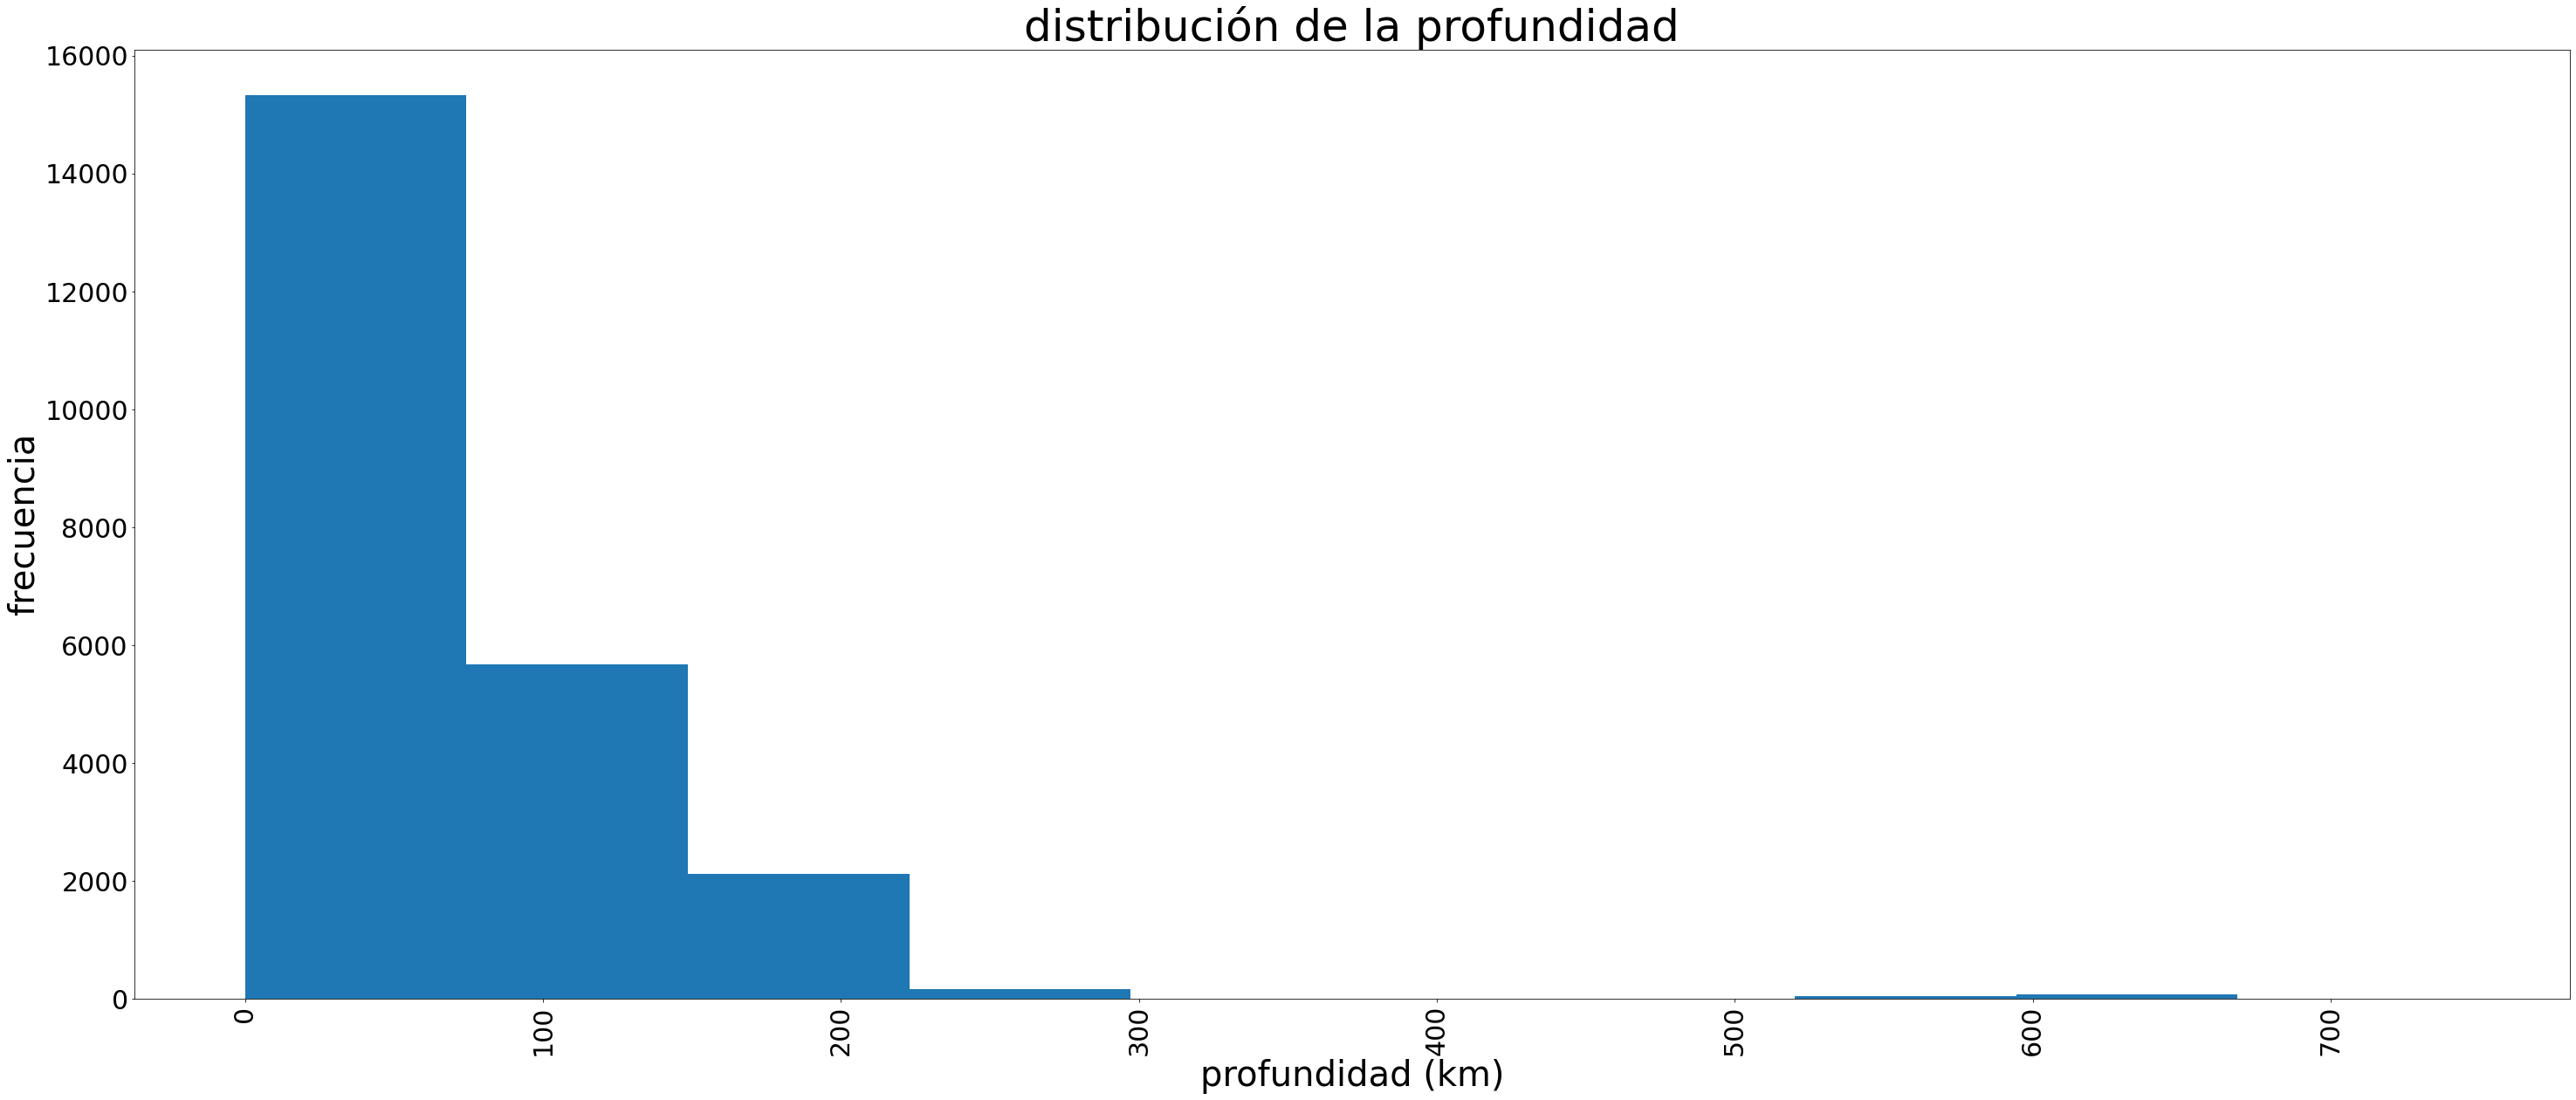

In [69]:
plt.figure(figsize=(50, 20))

df_sorted = df.sort_values('profundidad (km)', ascending=False)

plt.hist(df_sorted['profundidad (km)'])
plt.xlabel('profundidad (km)', fontsize=40)
plt.ylabel('frecuencia', fontsize=40)
plt.title('distribución de la profundidad', fontsize=50)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)

plt.show()

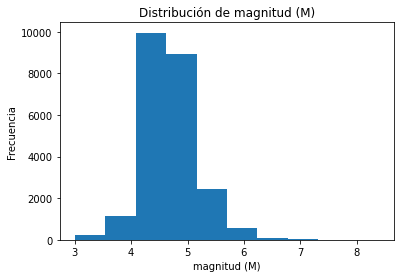

In [70]:
plt.hist(df['magnitud (M)'])
plt.xlabel('magnitud (M)')
plt.ylabel('Frecuencia')
plt.title('Distribución de magnitud (M)')
plt.show()

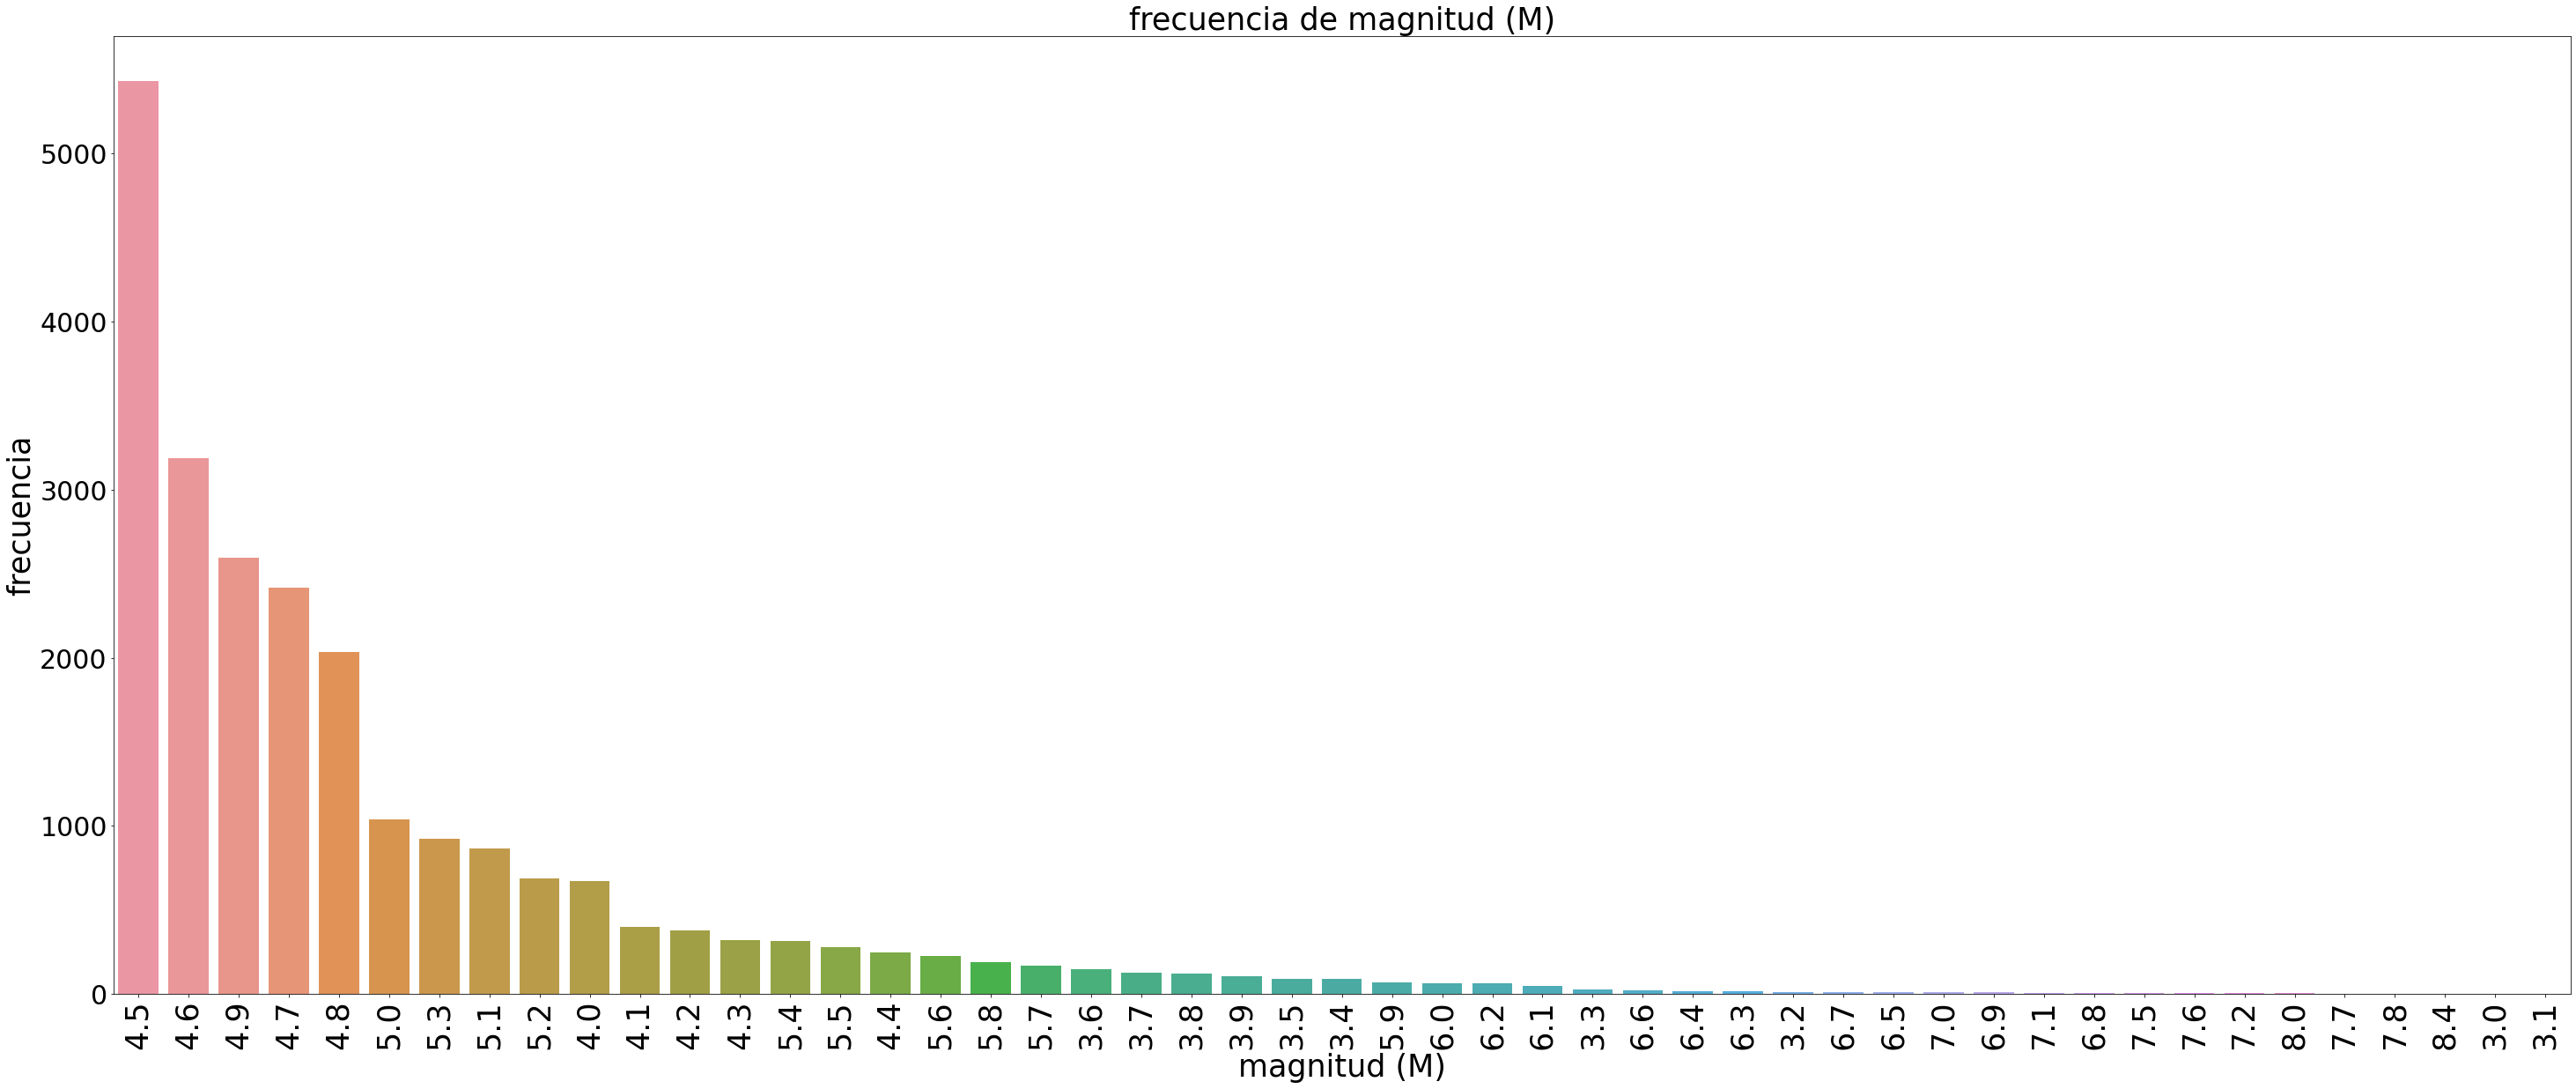

In [71]:
order = df['magnitud (M)'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(50, 20))
sns.countplot(data=df, x='magnitud (M)', order=order)
plt.xticks(rotation=90, fontsize=35)
plt.xlabel('magnitud (M)', fontsize=35)
plt.ylabel('frecuencia', fontsize=35)
plt.title('frecuencia de magnitud (M)', fontsize=35)
plt.yticks(fontsize=30)
plt.show()

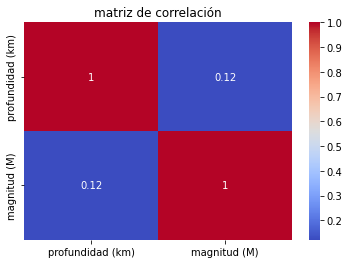

In [31]:
# Relaciones entre variables
correlation_matrix = df[['profundidad (km)', 'magnitud (M)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('matriz de correlación')
plt.show()

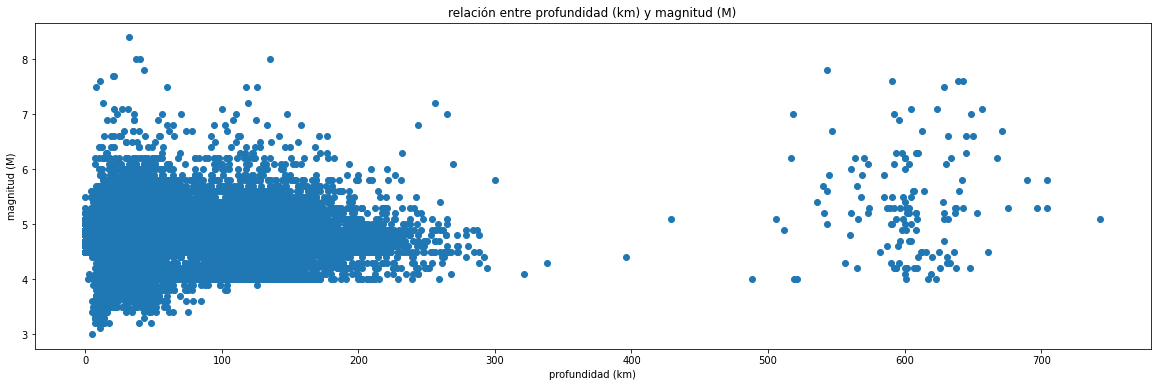

In [32]:
plt.figure(figsize=(20, 6))
plt.scatter(df['profundidad (km)'], df['magnitud (M)'])
plt.xlabel('profundidad (km)')
plt.ylabel('magnitud (M)')
plt.title('relación entre profundidad (km) y magnitud (M)')
plt.show()

<Figure size 1440x432 with 0 Axes>

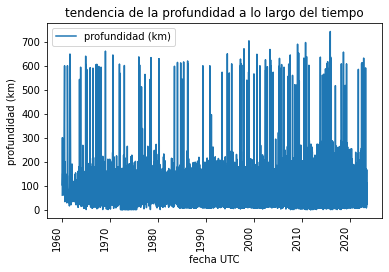

In [35]:
plt.figure(figsize=(20, 6))
df['fecha UTC'] = pd.to_datetime(df['fecha UTC'])
df['hora UTC'] = pd.to_datetime(df['hora UTC'])
df.plot(x='fecha UTC', y='profundidad (km)', kind='line')
plt.xlabel('fecha UTC')
plt.ylabel('profundidad (km)')
plt.title('tendencia de la profundidad a lo largo del tiempo')
plt.xticks(rotation='vertical')
plt.show()

<Figure size 864x432 with 0 Axes>

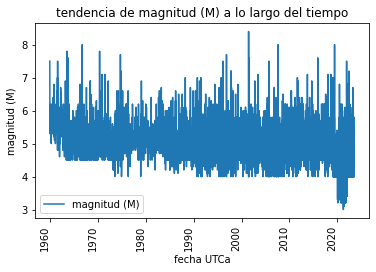

In [36]:
plt.figure(figsize=(12, 6))
df.plot(x='fecha UTC', y='magnitud (M)', kind='line')
plt.xlabel('fecha UTCa')
plt.ylabel('magnitud (M)')
plt.title('tendencia de magnitud (M) a lo largo del tiempo')
plt.xticks(rotation='vertical')
plt.show()

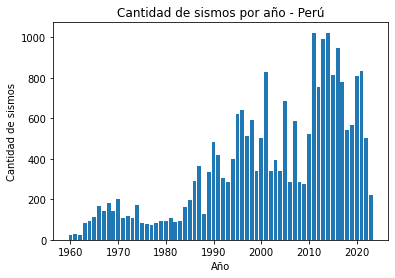

In [37]:
plt.bar(por_año.index, por_año.values)
plt.xlabel("Año")
plt.ylabel("Cantidad de sismos")
plt.title("Cantidad de sismos por año - Perú")
plt.show()